# Importing required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
corona_dataset_csv = pd.read_csv('covid19_Confirmed_dataset.csv')
corona_dataset_csv.head(10)


Province/State       Country/Region      Lat      Long  \
0                           NaN          Afghanistan  33.0000   65.0000   
1                           NaN              Albania  41.1533   20.1683   
2                           NaN              Algeria  28.0339    1.6596   
3                           NaN              Andorra  42.5063    1.5218   
4                           NaN               Angola -11.2027   17.8739   
5                           NaN  Antigua and Barbuda  17.0608  -61.7964   
6                           NaN            Argentina -38.4161  -63.6167   
7                           NaN              Armenia  40.0691   45.0382   
8  Australian Capital Territory            Australia -35.4735  149.0124   
9               New South Wales            Australia -33.8688  151.2093   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/21/20  \
0        0        0        0        0        0        0  ...     1092   
1        0        0        0        0        0        0  ...      609   
2        0        0        0        0        0        0  ...     2811   
3        0        0        0        0        0        0  ...      717   
4        0        0        0        0        0        0  ...       24   
5        0        0        0        0        0        0  ...       23   
6        0        0        0        0        0        0  ...     3031   
7        0        0        0        0        0        0  ...     1401   
8        0        0        0        0        0        0  ...      104   
9        0        0        0        0        3        4  ...     2969   

   4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  \
0     1176     1279     1351     1463     1531     1703     1828     1939   
1      634      663      678      712      726      736      750      766   
2     2910     3007     3127     3256     3382     3517     3649     3848   
3      723      723      731      738      738      743      743      743   
4       25       25       25       25       26       27       27       27   
5       24       24       24       24       24       24       24       24   
6     3144     3435     3607     3780     3892     4003     4127     4285   
7     1473     1523     1596     1677     1746     1808     1867     1932   
8      104      104      105      106      106      106      106      106   
9     2971     2976     2982     2994     3002     3004     3016     3016   

   4/30/20  
0     2171  
1      773  
2     4006  
3      745  
4       27  
5       24  
6     4428  
7     2066  
8      106  
9     3025  

[10 rows x 104 columns]

In [3]:
corona_dataset_csv.shape

(266, 104)

In [4]:
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

In [5]:
corona_dataset_csv.head(10)

Province/State       Country/Region  1/22/20  1/23/20  \
0                           NaN          Afghanistan        0        0   
1                           NaN              Albania        0        0   
2                           NaN              Algeria        0        0   
3                           NaN              Andorra        0        0   
4                           NaN               Angola        0        0   
5                           NaN  Antigua and Barbuda        0        0   
6                           NaN            Argentina        0        0   
7                           NaN              Armenia        0        0   
8  Australian Capital Territory            Australia        0        0   
9               New South Wales            Australia        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  ...  4/21/20  \
0        0        0        0        0        0        0  ...     1092   
1        0        0        0        0        0        0  ...      609   
2        0        0        0        0        0        0  ...     2811   
3        0        0        0        0        0        0  ...      717   
4        0        0        0        0        0        0  ...       24   
5        0        0        0        0        0        0  ...       23   
6        0        0        0        0        0        0  ...     3031   
7        0        0        0        0        0        0  ...     1401   
8        0        0        0        0        0        0  ...      104   
9        0        0        3        4        4        4  ...     2969   

   4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  \
0     1176     1279     1351     1463     1531     1703     1828     1939   
1      634      663      678      712      726      736      750      766   
2     2910     3007     3127     3256     3382     3517     3649     3848   
3      723      723      731      738      738      743      743      743   
4       25       25       25       25       26       27       27       27   
5       24       24       24       24       24       24       24       24   
6     3144     3435     3607     3780     3892     4003     4127     4285   
7     1473     1523     1596     1677     1746     1808     1867     1932   
8      104      104      105      106      106      106      106      106   
9     2971     2976     2982     2994     3002     3004     3016     3016   

   4/30/20  
0     2171  
1      773  
2     4006  
3      745  
4       27  
5       24  
6     4428  
7     2066  
8      106  
9     3025  

[10 rows x 102 columns]

 # Aggregating the rows with country

In [6]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head(10).sum(axis=1)

Country/Region
Afghanistan             28462
Albania                 17864
Algeria                 74325
Andorra                 21893
Angola                    649
Antigua and Barbuda       678
Argentina               84105
Armenia                 40610
Australia              224354
Austria                502063
dtype: int64

In [8]:
corona_dataset_aggregated.shape

(187, 100)

In [9]:
#from matplotlib.pyplot import figure
#countries=list(corona_dataset_aggregated.index)
#total_cases=corona_dataset_aggregated.sum(axis=1)
#plt.figure(figsize=(100,40),dpi=380)
#plt.xticks(rotation=90,fontsize=25)
#plt.bar(countries,total_cases)
#plt.show()
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')




# Visualizing data related to a country for example India,China,Spain,Italy

<AxesSubplot:>

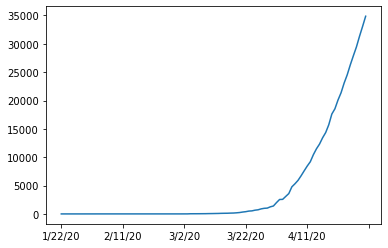

In [10]:
corona_dataset_aggregated.loc['India'].plot()

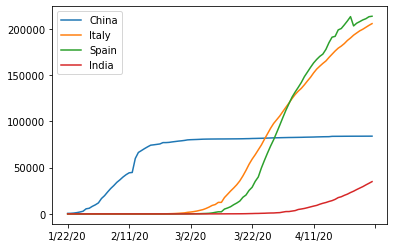

In [11]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
corona_dataset_aggregated.loc['India'].plot()
plt.legend()

##  TO GET THE RATE AT WHICH CASES ARE GROWING(DIFFERENTIATING THE CURVE)

<AxesSubplot:>

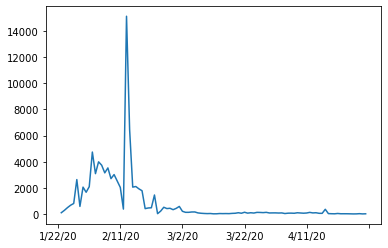

In [12]:
corona_dataset_aggregated.loc['China'].diff().plot()

<AxesSubplot:>

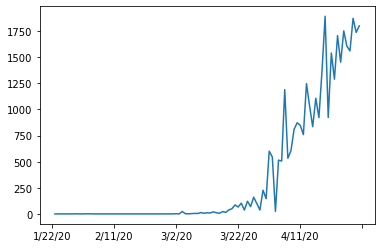

In [13]:
corona_dataset_aggregated.loc['India'].diff().plot()

## Find max infection rates for China and India

In [14]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [15]:
corona_dataset_aggregated.loc['India'].diff().max()

1893.0

In [16]:
corona_dataset_aggregated.loc['India',:]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    27890
4/27/20    29451
4/28/20    31324
4/29/20    33062
4/30/20    34863
Name: India, Length: 100, dtype: int64

# Finding average infection rates

In [17]:
corona_dataset_aggregated.loc['China'].diff().mean()

842.5050505050505

In [18]:
corona_dataset_aggregated.loc['India'].diff().mean()

352.1515151515151

## Find maximum infection rate for all of the countries.

In [19]:
countries = list(corona_dataset_aggregated.index)
ave_infection_rates = []
for country in countries :
    ave_infection_rates.append(corona_dataset_aggregated.loc[country].diff().mean())
corona_dataset_aggregated['mean infection rate'] = ave_infection_rates

In [20]:
corona_dataset_aggregated.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  4/22/20  4/23/20  4/24/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...     1176     1279     1351   
Albania               0        0        0  ...      634      663      678   
Algeria               0        0        0  ...     2910     3007     3127   
Andorra               0        0        0  ...      723      723      731   
Angola                0        0        0  ...       25       25       25   

                4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  \
Country/Region                                                         
Afghanistan        1463     1531     1703     1828     1939     2171   
Albania             712      726      736      750      766      773   
Algeria            3256     3382     3517     3649     3848     4006   
Andorra             738      738      743      743      743      745   
Angola               25       26       27       27       27       27   

                mean infection rate  
Country/Region                       
Afghanistan               21.929293  
Albania                    7.808081  
Algeria                   40.464646  
Andorra                    7.525253  
Angola                     0.272727  

[5 rows x 101 columns]

# Create a new dataframe with only needed column


In [21]:
corona_data = pd.DataFrame(corona_dataset_aggregated['mean infection rate'])

In [22]:
corona_data.head(10)

mean infection rate
Country/Region                          
Afghanistan                    21.929293
Albania                         7.808081
Algeria                        40.464646
Andorra                         7.525253
Angola                          0.272727
Antigua and Barbuda             0.242424
Argentina                      44.727273
Armenia                        20.868687
Australia                      68.343434
Austria                       156.080808

## Importing the world happiness report

In [23]:
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")
world_happiness_report.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [24]:
world_happiness_report.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [25]:
world_happiness_report.shape

(156, 9)

## Dropping useless Columns

In [26]:
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)

In [27]:
world_happiness_report.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0           Finland           1.340           1.587                    0.986   
1           Denmark           1.383           1.573                    0.996   
2            Norway           1.488           1.582                    1.028   
3           Iceland           1.380           1.624                    1.026   
4       Netherlands           1.396           1.522                    0.999   

   Freedom to make life choices  
0                         0.596  
1                         0.592  
2                         0.603  
3                         0.591  
4                         0.557

## Changing the indices of the dataframe

In [28]:
world_happiness_report.set_index(['Country or region'],inplace=True)
world_happiness_report.head()

GDP per capita  Social support  Healthy life expectancy  \
Country or region                                                            
Finland                     1.340           1.587                    0.986   
Denmark                     1.383           1.573                    0.996   
Norway                      1.488           1.582                    1.028   
Iceland                     1.380           1.624                    1.026   
Netherlands                 1.396           1.522                    0.999   

                   Freedom to make life choices  
Country or region                                
Finland                                   0.596  
Denmark                                   0.592  
Norway                                    0.603  
Iceland                                   0.591  
Netherlands                               0.557

## Joining the two datasets

In [29]:
data = world_happiness_report.join(corona_data,how="inner")
data.head()

GDP per capita  Social support  Healthy life expectancy  \
Finland               1.340           1.587                    0.986   
Denmark               1.383           1.573                    0.996   
Norway                1.488           1.582                    1.028   
Iceland               1.380           1.624                    1.026   
Netherlands           1.396           1.522                    0.999   

             Freedom to make life choices  mean infection rate  
Finland                             0.596            50.454545  
Denmark                             0.592            94.505051  
Norway                              0.603            78.161616  
Iceland                             0.591            18.151515  
Netherlands                         0.557           399.111111

## Correlation Matrix

In [30]:
data.corr()
# it is representing the correlation between every two columns of our dataset 

GDP per capita  Social support  \
GDP per capita                      1.000000        0.759468   
Social support                      0.759468        1.000000   
Healthy life expectancy             0.863062        0.765286   
Freedom to make life choices        0.394603        0.456246   
mean infection rate                 0.329073        0.241618   

                              Healthy life expectancy  \
GDP per capita                               0.863062   
Social support                               0.765286   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.427892   
mean infection rate                          0.341890   

                              Freedom to make life choices  \
GDP per capita                                    0.394603   
Social support                                    0.456246   
Healthy life expectancy                           0.427892   
Freedom to make life choices                      1.000000   
mean infection rate                               0.029595   

                              mean infection rate  
GDP per capita                           0.329073  
Social support                           0.241618  
Healthy life expectancy                  0.341890  
Freedom to make life choices             0.029595  
mean infection rate                      1.000000

<AxesSubplot:>

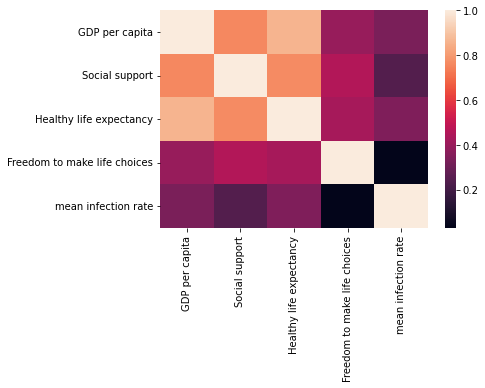

In [31]:
sns.heatmap(data.corr())

# Visualization of the results

## Plotting GDP vs maximum Infection rate

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GDP per capita', ylabel='mean infection rate'>

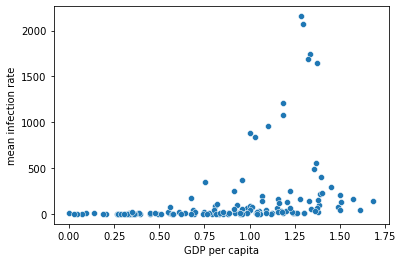

In [32]:
x = data['GDP per capita']
y = data['mean infection rate']
sns.scatterplot(x,y)    #VISUALISATION IS DIFFICULT BECAUSE OF DIFFERENCE Y SCALE AND X-SCALE

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GDP per capita', ylabel='mean infection rate'>

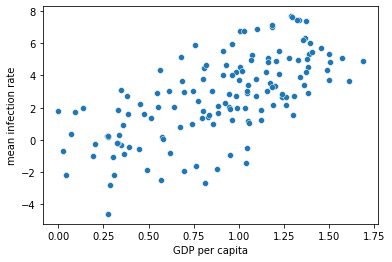

In [33]:
x = data['GDP per capita']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='GDP per capita', ylabel='mean infection rate'>

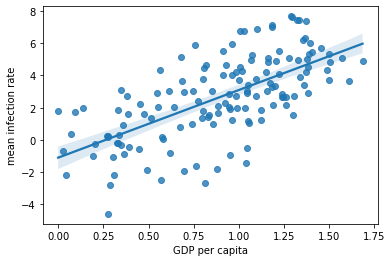

In [34]:
sns.regplot(x,np.log(y))

## Plotting Social support vs maximum Infection rate

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Social support', ylabel='mean infection rate'>

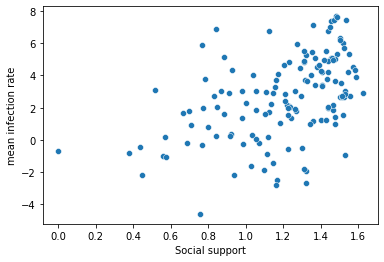

In [35]:
x = data['Social support']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Social support', ylabel='mean infection rate'>

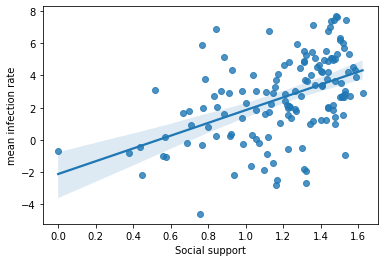

In [36]:
sns.regplot(x,np.log(y))

## Plotting Healthy life expectancy vs maximum Infection rate

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Healthy life expectancy', ylabel='mean infection rate'>

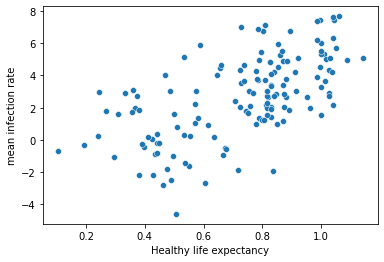

In [37]:
x = data['Healthy life expectancy']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Healthy life expectancy', ylabel='mean infection rate'>

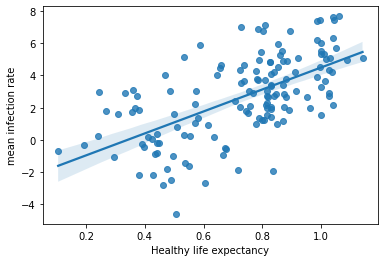

In [38]:
sns.regplot(x,np.log(y))

## Plotting Freedom to make life choices vs maximum Infection rate

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Freedom to make life choices', ylabel='mean infection rate'>

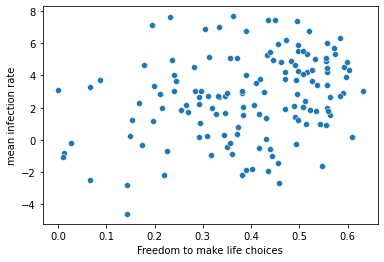

In [39]:
x = data['Freedom to make life choices']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

D:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Freedom to make life choices', ylabel='mean infection rate'>

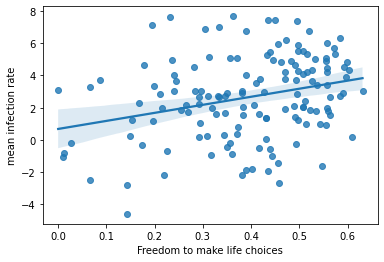

In [40]:
sns.regplot(x,np.log(y))

In [41]:
from covid import Covid

covid = Covid()
covid.get_data()
len(covid.get_data())

196

In [42]:
countries = covid.list_countries()

In [43]:
italy_cases = covid.get_status_by_country_id(115)

In [44]:
india_cases = covid.get_status_by_country_name("india")
india_cases

{'id': '80',
 'country': 'India',
 'confirmed': 34674643,
 'active': None,
 'deaths': 474479,
 'recovered': None,
 'latitude': 20.593684,
 'longitude': 78.96288,
 'last_update': 1639146106000}

In [45]:
df=pd.DataFrame(data=covid.get_data())
df.head()

id         country  confirmed active  deaths recovered   latitude  \
0  183              US   49666654   None  794656      None  40.000000   
1   80           India   34674643   None  474479      None  20.593684   
2   24          Brazil   22177059   None  616457      None -14.235000   
3  187  United Kingdom   10722083   None  146592      None  55.000000   
4  145          Russia    9782723   None  281571      None  61.524000   

   longitude    last_update  
0 -100.00000  1639146106000  
1   78.96288  1639146106000  
2  -51.92530  1639146106000  
3   -3.00000  1639146106000  
4  105.31880  1639146106000

In [46]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="country", locationmode='country names', 
                  color=col, hover_name="country", 
                  title=col, hover_data=[col], color_continuous_scale=pal)

    fig.show()

In [47]:
plot_map(df, 'confirmed', 'matter')

In [48]:
plot_map(df, 'deaths', 'matter')

In [49]:
def plot_treemap(col):
    fig = px.treemap(df, path=["country"], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [50]:
plot_treemap('confirmed')

In [51]:
df.drop(['latitude','longitude','id'],axis=1,inplace=True)
df.head()

country  confirmed active  deaths recovered    last_update
0              US   49666654   None  794656      None  1639146106000
1           India   34674643   None  474479      None  1639146106000
2          Brazil   22177059   None  616457      None  1639146106000
3  United Kingdom   10722083   None  146592      None  1639146106000
4          Russia    9782723   None  281571      None  1639146106000

In [52]:
df.set_index('country',inplace=True)
df.head()

confirmed active  deaths recovered    last_update
country                                                          
US               49666654   None  794656      None  1639146106000
India            34674643   None  474479      None  1639146106000
Brazil           22177059   None  616457      None  1639146106000
United Kingdom   10722083   None  146592      None  1639146106000
Russia            9782723   None  281571      None  1639146106000

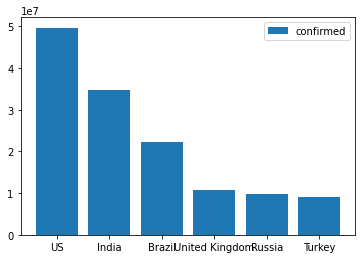

In [53]:
countries=df.index[:6]
confirm=df['confirmed'][:6].to_numpy()
plt.bar(countries,confirm,label='confirmed')
plt.legend()

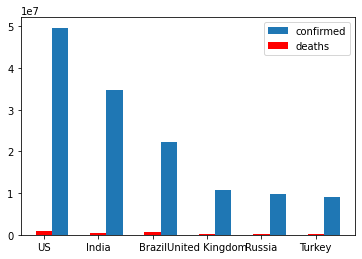

In [54]:
countries=df.index[:6]
confirm=df['confirmed'][:6].to_numpy()
total_deaths=df['deaths'][:6].to_numpy()

xpos=np.arange(6)

plt.bar(xpos+0.3,confirm,label='confirmed',width=0.3)
plt.bar(xpos,total_deaths,label='deaths',width=0.3,color='red')
plt.xticks(xpos,countries)
plt.legend()

In [55]:
final=df.join(corona_data,how='inner')
len(final)

186

In [56]:
final.head()

confirmed active  deaths recovered    last_update  \
US               49666654   None  794656      None  1639146106000   
India            34674643   None  474479      None  1639146106000   
Brazil           22177059   None  616457      None  1639146106000   
United Kingdom   10722083   None  146592      None  1639146106000   
Russia            9782723   None  281571      None  1639146106000   

                mean infection rate  
US                     10802.252525  
India                    352.151515  
Brazil                   880.676768  
United Kingdom          1742.232323  
Russia                  1075.737374

# Joining Data from covid library and World Happiness Index

In [57]:
data1 = world_happiness_report.join(df,how="inner")

data1.head(10)

GDP per capita  Social support  Healthy life expectancy  \
Finland               1.340           1.587                    0.986   
Denmark               1.383           1.573                    0.996   
Norway                1.488           1.582                    1.028   
Iceland               1.380           1.624                    1.026   
Netherlands           1.396           1.522                    0.999   
Switzerland           1.452           1.526                    1.052   
Sweden                1.387           1.487                    1.009   
New Zealand           1.303           1.557                    1.026   
Canada                1.365           1.505                    1.039   
Austria               1.376           1.475                    1.016   

             Freedom to make life choices  confirmed active  deaths recovered  \
Finland                             0.596     201051   None    1421      None   
Denmark                             0.592     542181   None    2996      None   
Norway                              0.603     305368   None    1135      None   
Iceland                             0.591      19159   None      35      None   
Netherlands                         0.557    2870459   None   20372      None   
Switzerland                         0.572    1111923   None   11739      None   
Sweden                              0.574    1226055   None   15185      None   
New Zealand                         0.585      12623   None      44      None   
Canada                              0.584    1831341   None   29930      None   
Austria                             0.532    1221095   None   13076      None   

               last_update  
Finland      1639146106000  
Denmark      1639146106000  
Norway       1639146106000  
Iceland      1639146106000  
Netherlands  1639146106000  
Switzerland  1639146106000  
Sweden       1639146106000  
New Zealand  1639146106000  
Canada       1639146106000  
Austria      1639146106000

## Scaling data  

In [58]:
data1.drop(['active','recovered','last_update'],axis=1 ,inplace = True)
data1.head()

GDP per capita  Social support  Healthy life expectancy  \
Finland               1.340           1.587                    0.986   
Denmark               1.383           1.573                    0.996   
Norway                1.488           1.582                    1.028   
Iceland               1.380           1.624                    1.026   
Netherlands           1.396           1.522                    0.999   

             Freedom to make life choices  confirmed  deaths  
Finland                             0.596     201051    1421  
Denmark                             0.592     542181    2996  
Norway                              0.603     305368    1135  
Iceland                             0.591      19159      35  
Netherlands                         0.557    2870459   20372

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data1)

In [60]:
from pandas import DataFrame
datax = DataFrame(scaled)
datax.head()

0         1         2         3         4         5
0  0.795724  0.977217  0.850386  0.944532  0.005722  0.002300
1  0.821259  0.968596  0.860039  0.938193  0.015561  0.004855
2  0.883610  0.974138  0.890927  0.955626  0.008731  0.001836
3  0.819477  1.000000  0.888996  0.936609  0.000476  0.000052
4  0.828979  0.937192  0.862934  0.882726  0.082713  0.033042

# Performing linear regression

In [61]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [62]:
x = datax.iloc[:, -6].values #GDP 
y = datax.iloc[:, -1].values #deaths 
x= x.reshape(-1,1)
regression_model.fit(x,y) #GDP vs Deaths


LinearRegression()

In [63]:
y_predicted = regression_model.predict(x)

In [64]:
from sklearn.metrics import mean_squared_error ,r2_score
mse = mean_squared_error(y,y_predicted)

In [65]:
mse

0.015631230121152265

In [66]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)

In [67]:
rmse

0.12502491800098198

In [68]:
r2

0.021593705847284927

## GDP alone cannot explain variance of deaths

# Gradient descent approach

In [69]:
# Gradient descent_Build the model
m = 0
c = 0
L = 0.00001
epochs = 10000 #the number of iterations to perform gradiation
X = datax.iloc[:, -6].values #attributes to determine dependant variable/ Class
Y = datax.iloc[:, -1].values #dependant variable/ Class
n = float(len(X))
n

144.0

In [70]:
for i in range(epochs):
    Y_pred = m*X + c #The current predicted value of Y
    D_m = (-2/n) * sum(X* (Y - Y_pred)) # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred) # Derivative of c
    m = m - L* D_m # Update m
    c = c - L*D_c # Update c
print (m,c)    

0.005452208077273036 0.008711837822156551


Text(0, 0.5, 'Y')

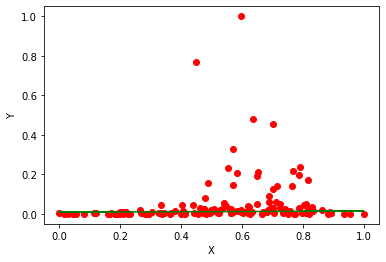

In [71]:
Y_pred = m*X + c
plt.scatter(X,Y,color = "red")
plt.plot(X,Y_pred,color = "green")
plt.xlabel("X")
plt.ylabel("Y")

## Outliers of the Data Frame 

# Social support index vs Deaths due to covid

In [72]:
x = datax.iloc[:, -5].values #attributes to determine dependant variable/ Class
y = datax.iloc[:, -1].values #dependant variable/ Class
x= x.reshape(-1,1)
regression_model.fit(x,y)

LinearRegression()

In [73]:
y_predicted = regression_model.predict(x)

In [74]:
mse = mean_squared_error(y,y_predicted)
mse

0.015785897837850917

In [75]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.011912582458575072

# Healthy Life Expectancy Vs Deaths due to covid

In [76]:
x = datax.iloc[:, -4].values #attributes to determine dependant variable/ Class
y = datax.iloc[:, -1].values #dependant variable/ Class
x= x.reshape(-1,1)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse = mean_squared_error(y,y_predicted)
mse

0.0156979693574256

In [77]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.017416293811848615

# Vaccinations

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [79]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...

In [80]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     25685
people_vaccinated                      27190
people_fully_vaccinated                30037
daily_vaccinations_raw                 31124
daily_vaccinations                       253
total_vaccinations_per_hundred         25685
people_vaccinated_per_hundred          27190
people_fully_vaccinated_per_hundred    30037
daily_vaccinations_per_million           253
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [81]:
df.fillna(value = 0, inplace = True)
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)
date = df.date.str.split('-', expand =True)
date

0   1   2
0      2021  02  22
1      2021  02  23
2      2021  02  24
3      2021  02  25
4      2021  02  26
...     ...  ..  ..
55819  2021  11  01
55820  2021  11  02
55821  2021  11  03
55822  2021  11  04
55823  2021  11  05

[55824 rows x 3 columns]

In [82]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)
df.date = pd.to_datetime(df.date)
df.head()

country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                   0                  0   
1  Afghanistan      AFG 2021-02-23                   0                  0   
2  Afghanistan      AFG 2021-02-24                   0                  0   
3  Afghanistan      AFG 2021-02-25                   0                  0   
4  Afghanistan      AFG 2021-02-26                   0                  0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                        0                       0                   0   
1                        0                       0                1367   
2                        0                       0                1367   
3                        0                       0                1367   
4                        0                       0                1367   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                    0                               0   
1                                    0                              34   
2                                    0                              34   
3                                    0                              34   
4                                    0                              34   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  year  month  day  
0  https://reliefweb.int/sites/reliefweb.int/file...  2021      2   22  
1  https://reliefweb.int/sites/reliefweb.int/file...  2021      2   23  
2  https://reliefweb.int/sites/reliefweb.int/file...  2021      2   24  
3  https://reliefweb.int/sites/reliefweb.int/file...  2021      2   25  
4  https://reliefweb.int/sites/reliefweb.int/file...  2021      2   26

In [83]:
df.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        5.582400e+04       5.582400e+04             5.582400e+04   
mean         9.954941e+06       5.624392e+06             3.438866e+06   
std          1.057154e+08       3.158674e+07             1.941963e+07   
min         -2.147484e+09       0.000000e+00             0.000000e+00   
25%          0.000000e+00       0.000000e+00             0.000000e+00   
50%          3.108000e+04       4.969000e+03             0.000000e+00   
75%          2.477739e+06       1.369812e+06             6.764480e+05   
max          2.142580e+09       1.100842e+09             1.070386e+09   

       daily_vaccinations_raw  daily_vaccinations  \
count            5.582400e+04        5.582400e+04   
mean             1.134868e+05        1.297107e+05   
std              8.412834e+05        8.228933e+05   
min              0.000000e+00        0.000000e+00   
25%              0.000000e+00        9.220000e+02   
50%              0.000000e+00        7.007000e+03   
75%              1.709025e+04        4.154275e+04   
max              2.474100e+07        2.242429e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    55824.000000                   55824.000000   
mean                        28.357785                      15.636644   
std                         45.498547                      24.255363   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                         42.000000                      26.000000   
max                        269.000000                     120.000000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
count                         55824.000000                    55824.000000   
mean                             11.008222                     3480.269669   
std                              20.232838                     4241.817117   
min                               0.000000                        0.000000   
25%                               0.000000                      586.000000   
50%                               0.000000                     2205.000000   
75%                              12.000000                     5095.000000   
max                             118.000000                   117497.000000   

               year         month           day  
count  55824.000000  55824.000000  55824.000000  
mean    2020.993730      6.266946     15.846106  
std        0.078934      2.637807      8.869602  
min     2020.000000      1.000000      1.000000  
25%     2021.000000      4.000000      8.000000  
50%     2021.000000      6.000000     16.000000  
75%     2021.000000      8.000000     24.000000  
max     2021.000000     12.000000     31.000000

In [84]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [85]:
def size(m,n):
    fig = plt.gcf();
    fig.set_size_inches(m,n);

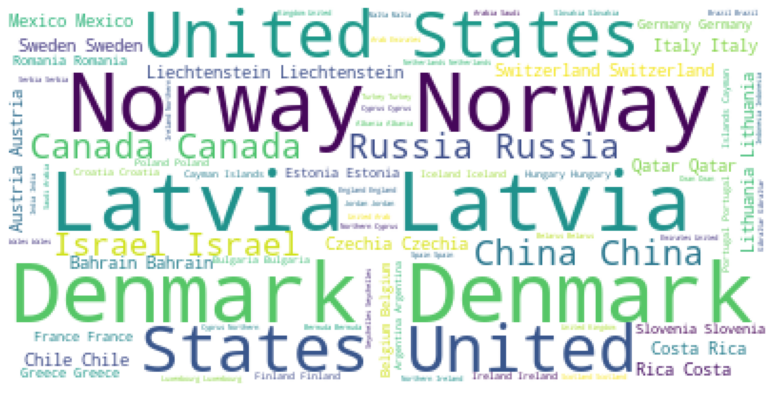

In [86]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.country))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [87]:
country_wise_total_vaccinated = {}
for country in df.country.unique() : 
    vaccinated = 0
    for i in range(len(df)) : 
        if df.country[i] == country : 
            vaccinated += df.daily_vaccinations[i]
    country_wise_total_vaccinated[country] = vaccinated 
#     made a seperate dict from the df 
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])
#     converted dict to df 
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)
country_wise_total_vaccinated_df

C:\Users\dell\AppData\Local\Temp/ipykernel_8784/469794026.py:6: RuntimeWarning:

overflow encountered in long_scalars



total_vaccinted_till_date
India                         1070252854
United States                  426856166
Brazil                         277092585
Indonesia                      196518393
Japan                          189787850
...                                  ...
Niue                                2484
Tokelau                             1966
Burundi                              610
Pitcairn                              43
China                        -2007914084

[223 rows x 1 columns]

# 

In [88]:
datar = country_wise_total_vaccinated_df.join(data1,how="inner")

datar.head(10)

total_vaccinted_till_date  GDP per capita  Social support  \
India                          1070252854           0.755           0.765   
Brazil                          277092585           1.004           1.439   
Indonesia                       196518393           0.931           1.203   
Japan                           189787850           1.327           1.419   
Mexico                          125372969           1.070           1.323   
Turkey                          117406602           1.183           1.360   
Germany                         112306162           1.373           1.454   
Pakistan                        107371250           0.677           0.886   
Russia                          105282120           1.183           1.452   
United Kingdom                  102153121           1.333           1.538   

                Healthy life expectancy  Freedom to make life choices  \
India                             0.588                         0.498   
Brazil                            0.802                         0.390   
Indonesia                         0.660                         0.491   
Japan                             1.088                         0.445   
Mexico                            0.861                         0.433   
Turkey                            0.808                         0.195   
Germany                           0.987                         0.495   
Pakistan                          0.535                         0.313   
Russia                            0.726                         0.334   
United Kingdom                    0.996                         0.450   

                confirmed  deaths  
India            34674643  474479  
Brazil           22177059  616457  
Indonesia         4258560  143918  
Japan             1727654   18367  
Mexico            3911714  296188  
Turkey            8986377   78602  
Germany           6427417  105000  
Pakistan          1288366   28812  
Russia            9782723  281571  
United Kingdom   10722083  146592

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datar)

In [90]:
from pandas import DataFrame
data_scaled = DataFrame(scaled)
data_scaled.head()

0         1         2         3         4         5         6
0  1.000000  0.448337  0.471059  0.466216  0.789223  1.000000  0.769686
1  0.742327  0.596200  0.886084  0.672780  0.618067  0.639548  1.000000
2  0.716151  0.552850  0.740764  0.535714  0.778130  0.122748  0.233456
3  0.713965  0.788005  0.873768  0.948842  0.705230  0.049752  0.029790
4  0.693038  0.635392  0.814655  0.729730  0.686212  0.112744  0.480466

In [91]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
from sklearn.metrics import mean_squared_error ,r2_score

x = data_scaled.iloc[:, -7].values #attributes to determine dependant variable/ Class
y = data_scaled.iloc[:, -1].values #dependant variable/ Class
x=x.reshape(-1,1)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse = mean_squared_error(y,y_predicted)
mse

0.013823870773761234

In [92]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.1449725320537083

In [93]:
x = data_scaled.iloc[:, -7].values #attributes to determine dependant variable/ Class
y = data_scaled.iloc[:, -2].values #dependant variable/ Class
x=x.reshape(-1,1)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse = mean_squared_error(y,y_predicted)
mse

0.009501470187026878

In [94]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.22022315976696827

#  Multinomial regression 

## Performing multinomial regreesion on (Vaccination,GDP) vs Deaths due to Covid

In [95]:
data_scaled

0         1         2         3         4         5         6
0    1.000000  0.448337  0.471059  0.466216  0.789223  1.000000  0.769686
1    0.742327  0.596200  0.886084  0.672780  0.618067  0.639548  1.000000
2    0.716151  0.552850  0.740764  0.535714  0.778130  0.122748  0.233456
3    0.713965  0.788005  0.873768  0.948842  0.705230  0.049752  0.029790
4    0.693038  0.635392  0.814655  0.729730  0.686212  0.112744  0.480466
..        ...       ...       ...       ...       ...       ...       ...
137  0.652380  0.207838  0.471675  0.083977  0.275753  0.000088  0.000289
138  0.652353  0.181710  0.354064  0.183398  0.015848  0.000294  0.000211
139  0.652349  0.191805  0.423645  0.332046  0.041204  0.000666  0.001225
140  0.652309  0.027316  0.275246  0.265444  0.348653  0.000518  0.000057
141  0.000000  0.611045  0.692734  0.760618  0.825674  0.003156  0.007861

[142 rows x 7 columns]

In [104]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
X = data_scaled[[0,1]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = data_scaled[6]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R sqaure: \n')
regr.score(X, Y)

Intercept: 
 -0.4866183114101143
Coefficients: 
 [0.75670296 0.07414227]
R sqaure: 



0.16382754007909928

## Performing multinomial regreesion on (Vaccination,GDP) vs Deaths due to Covid using stastical models

In [98]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

D:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     13.62
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        20:38:27   Log-Likelihood:                 104.07
No. Observations:                 142   AIC:                            -202.1
Df Residuals:                     139   BIC:                            -193.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4866      0.104     -4.660      0.0

# Polonomial Regression 

In [105]:
X = data_scaled[0] # Vaccinated list of different countries
Y =data_scaled[6] # Covid Confirmed cases

## Polynomial regression (Vaccinations vs Confirmed cases)

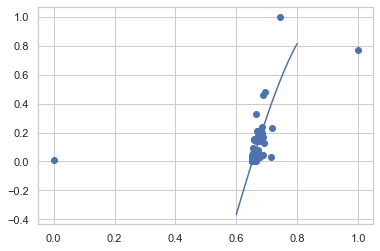

In [120]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0.6, 0.8, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()

## Rsquare value of Vaccinations vs Confirmed cases

In [121]:
print(r2_score(Y, mymodel(X)))

0.6847344781455831


# Polynomial regression (Vaccinations vs Deaths)

In [122]:
X = data_scaled[0] #Vaccinated list
Y =data_scaled[5] # Deaths  due to covid

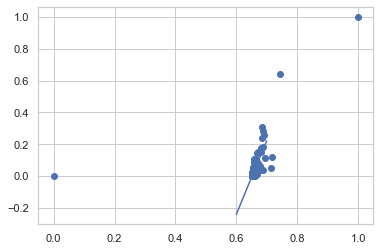

R2 value of Vaccinations vs Deaths:
0.8397867607203168


In [125]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0.6, 0.7, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 value of Vaccinations vs Deaths:")
print(r2_score(Y, mymodel(X)))

# Polynomial Regression (GDP vs Deaths)

In [130]:
X = data_scaled[1] 
Y =data_scaled[5] 

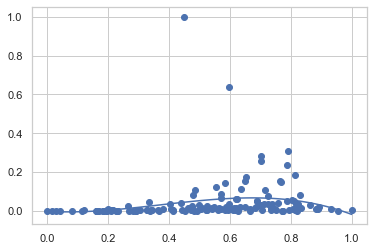

R2 value of Gdp vs Deaths:
0.049696032274289315


In [131]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0, 1, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 value of Gdp vs Deaths:")
print(r2_score(Y, mymodel(X)))